<a href="https://colab.research.google.com/github/Nedzelskij/ML_lab3/blob/main/Nedzelsky_ml_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import graphviz
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

# 1. Відкрити та зчитати наданий файл з даними.

In [97]:
df = pd.read_csv('dataset_2.txt', sep=',', header=None)

df.columns = ['ID', 'Date', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Target']

# 2. Визначити та вивести кількість записів та кількість полів у завантаженому наборі даних.

In [98]:
rows, columns = df.shape

print(f'\nNumber of records: {rows}')
print(f'Number of filds: {columns}')


Number of records: 8143
Number of filds: 8


# 3. Вивести перші 10 записів набору даних.

In [99]:
df.head(10)

,ID,Date,Column1,Column2,Column3,Column4,Column5,Target
0,1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


# 4. Розділити набір даних на навчальну (тренувальну) та тестову вибірки.

In [100]:
y = df['Target']

train_df, test_df = train_test_split(df, test_size=0.2, stratify=y, random_state=24)

# 5. Використовуючи відповідні функції бібліотеки scikit-learn, збудувати класифікаційну модель дерева прийняття рішень глибини 5 та навчити її на тренувальній вибірці, вважаючи, що в наданому наборі даних цільова характеристика визначається останнім стовпчиком, а всі інші (окрім двох перших) виступають в ролі вихідних аргументів.

In [101]:
x_cord_train = train_df.iloc[:, 2:-1]
y_cord_train = train_df.iloc[:, -1]

train_model_entropy = DecisionTreeClassifier(max_depth=5, criterion='entropy')
train_model_entropy.fit(x_cord_train, y_cord_train)

train_model_gini = DecisionTreeClassifier(max_depth=5, criterion='gini')
train_model_gini.fit(x_cord_train, y_cord_train)

DecisionTreeClassifier(max_depth=5)

# 6. Представити графічно побудоване дерево за допомогою бібліотеки graphviz.

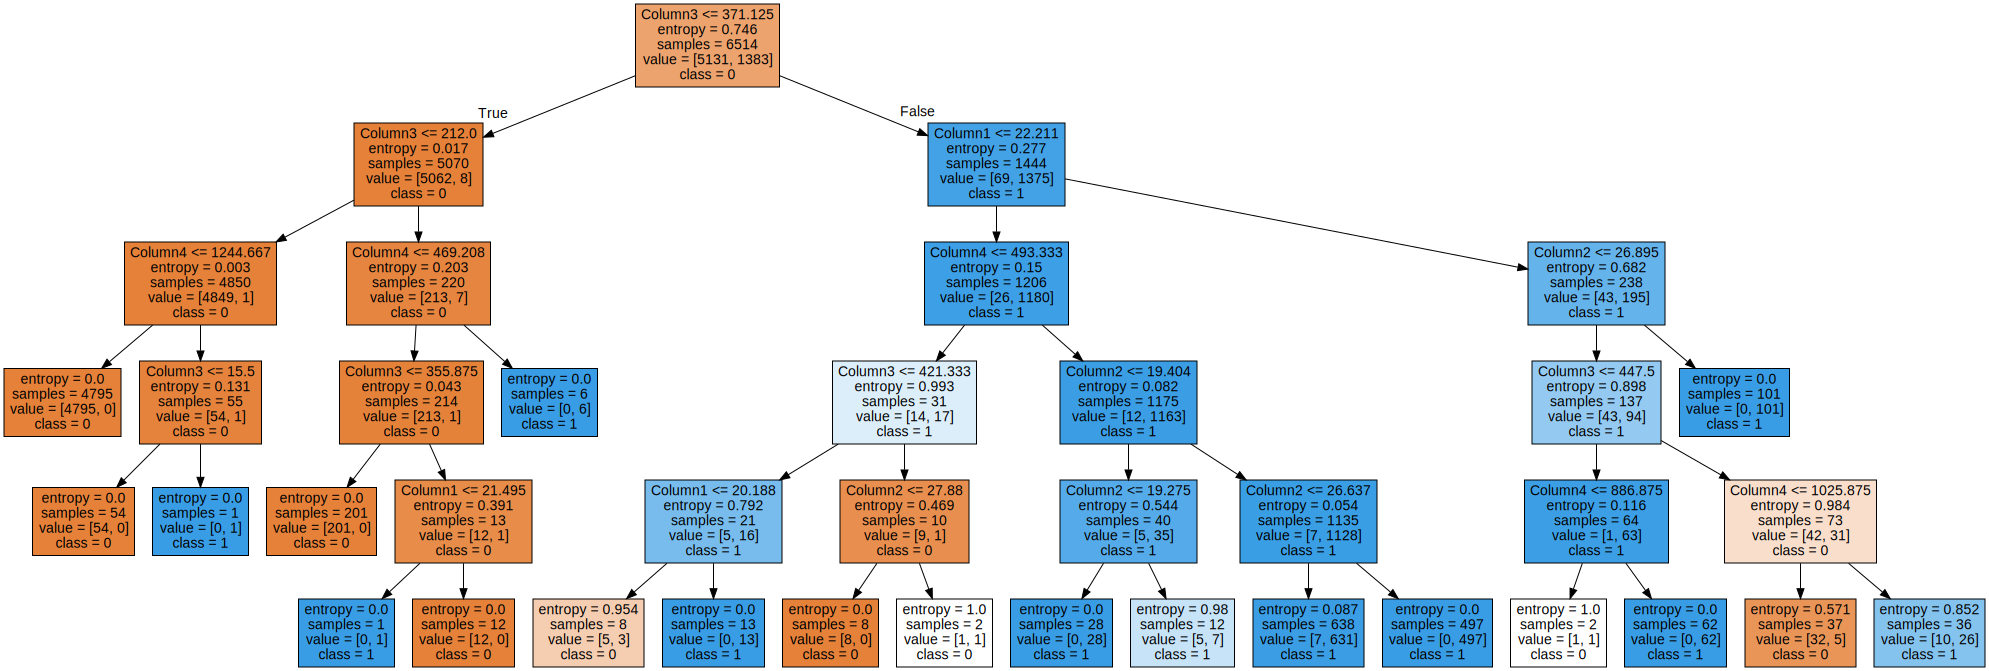

In [102]:
image = export_graphviz(
    train_model_entropy,
    feature_names=x_cord_train.columns,
    class_names=y_cord_train.unique().astype(str).tolist(),
    filled=True,
    impurity='entropy'
    )

graphviz.Source(image)

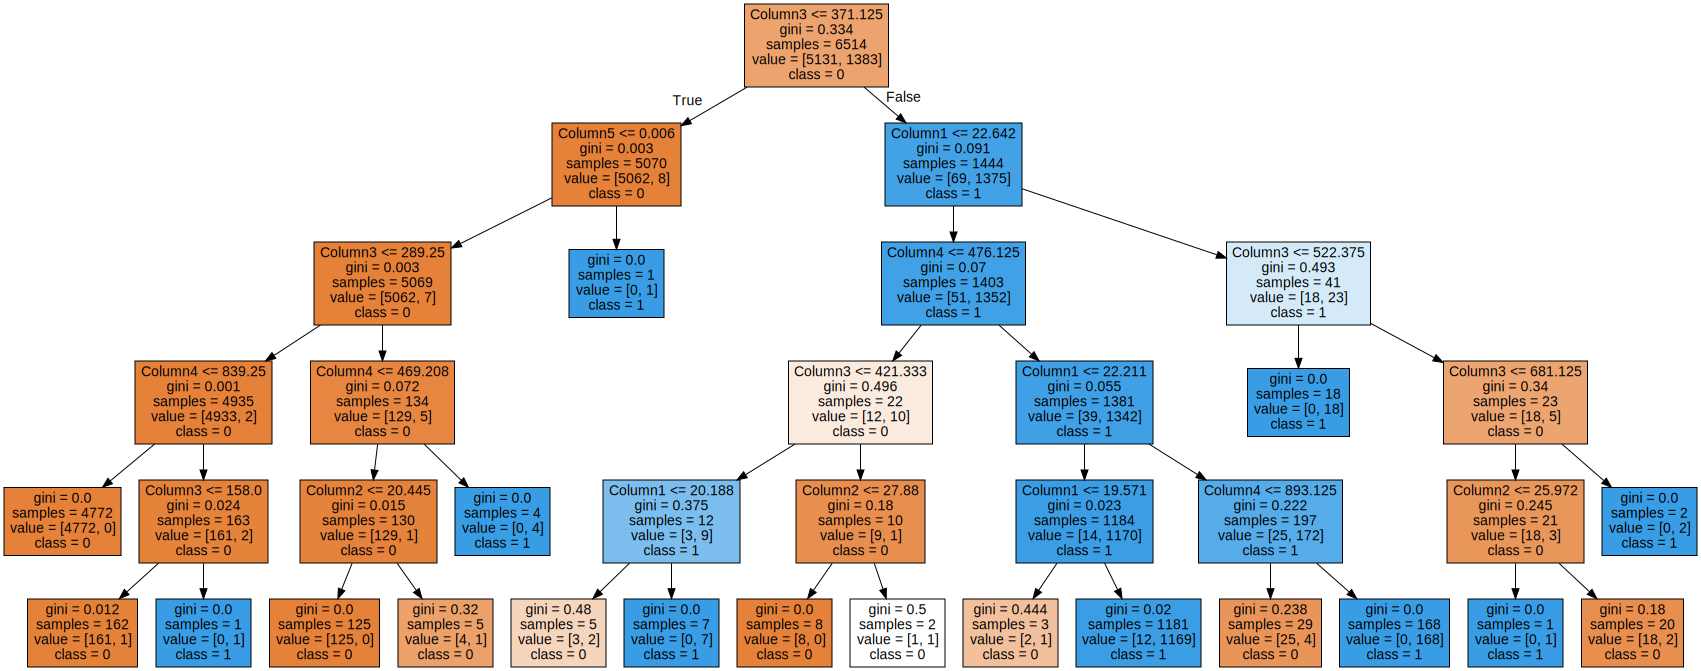

In [103]:
image = export_graphviz(
    train_model_gini,
    feature_names=x_cord_train.columns,
    class_names=y_cord_train.unique().astype(str).tolist(),
    filled=True,
    impurity='gini'
    )

graphviz.Source(image)

# 7. Обчислити класифікаційні метрики збудованої моделі для тренувальної та тестової вибірки. Представити результати роботи моделі на тестовій вибірці графічно. Порівняти результати, отриманні при застосуванні різних критеріїв розщеплення: інформаційний приріст на основі ентропії чи неоднорідності Джині.

In [104]:
def calculate_all_metrics_for_decision_tree(model: DecisionTreeClassifier, x_cord: pd.DataFrame, y_cord: pd.Series)-> dict:
    all_metrics = {'accuracy': 0, 'precision': 0, 'recall': 0, 'f_scores': 0,
                  'MCC': 0, 'BA': 0, 'Y_J_statistics': 0}

    model_predictions = model.predict(x_cord)

    all_metrics['accuracy'] = accuracy_score(y_cord, model_predictions)
    all_metrics['precision'] = precision_score(y_cord, model_predictions) # , average='weighted'
    all_metrics['recall'] = recall_score(y_cord, model_predictions)
    all_metrics['f_scores'] = f1_score(y_cord, model_predictions)
    all_metrics['MCC'] = matthews_corrcoef(y_cord, model_predictions)
    all_metrics['BA'] = balanced_accuracy_score(y_cord, model_predictions)
    all_metrics['Y_J_statistics'] = recall_score(y_cord, model_predictions) + recall_score(y_cord, model_predictions, pos_label=0) - 1

    return all_metrics


x_cord_test = test_df.iloc[:, 2:-1]
y_cord_test = test_df.iloc[:, -1]
x_cord_train = train_df.iloc[:, 2:-1]
y_cord_train = train_df.iloc[:, -1]

metrics_test_gini = calculate_all_metrics_for_decision_tree(train_model_gini, x_cord_test, y_cord_test)
metrics_train_gini = calculate_all_metrics_for_decision_tree(train_model_gini, x_cord_train, y_cord_train)

metrics_test_entropy = calculate_all_metrics_for_decision_tree(train_model_entropy, x_cord_test, y_cord_test)
metrics_train_entropy = calculate_all_metrics_for_decision_tree(train_model_entropy, x_cord_train, y_cord_train)

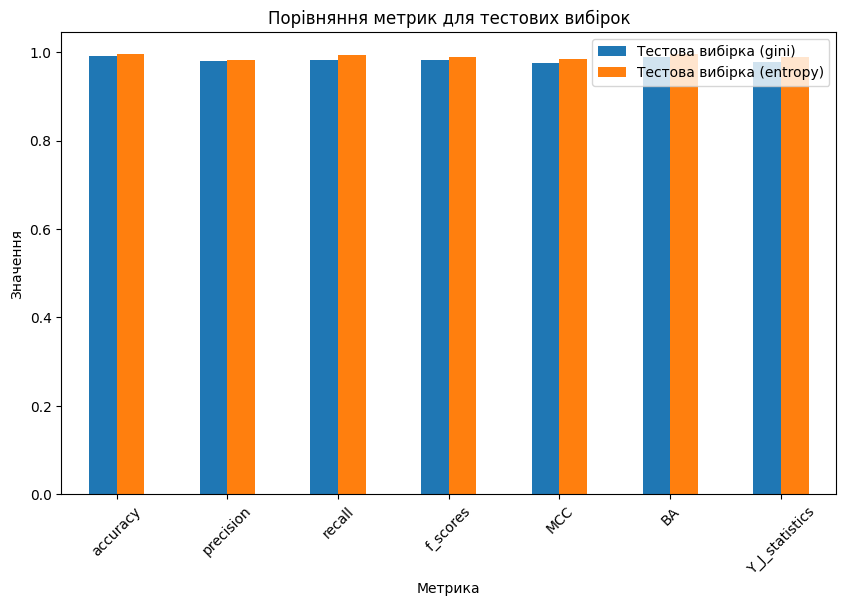

In [105]:
df_test_test = pd.DataFrame({'Тестова вибірка (gini)': metrics_test_gini, 'Тестова вибірка (entropy)': metrics_test_entropy})

df_test_test.plot(kind='bar', figsize=(10, 6))
plt.title('Порівняння метрик для тестових вибірок')
plt.ylabel('Значення')
plt.xlabel('Метрика')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [106]:
df_test_test

,Тестова вибірка (gini),Тестова вибірка (entropy)
accuracy,0.992020,0.995089
precision,0.979827,0.982857
recall,0.982659,0.994220
f_scores,0.981241,0.988506
MCC,0.976174,0.985410
BA,0.988601,0.994772
Y_J_statistics,0.977203,0.989543


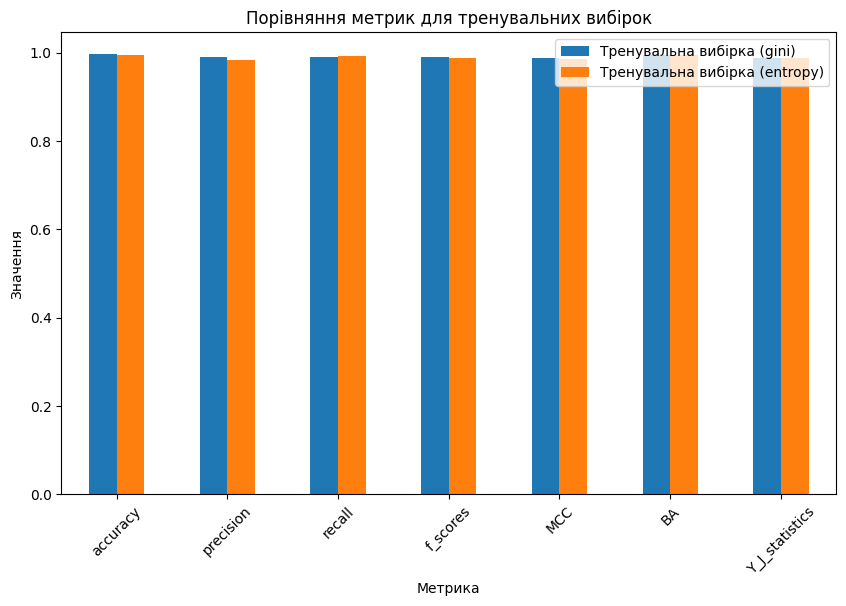

In [107]:
df_train_train = pd.DataFrame({'Тренувальна вибірка (gini)': metrics_train_gini, 'Тренувальна вибірка (entropy)': metrics_train_entropy})

df_train_train.plot(kind='bar', figsize=(10, 6))
plt.title('Порівняння метрик для тренувальних вибірок')
plt.ylabel('Значення')
plt.xlabel('Метрика')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [108]:
df_train_train

,Тренувальна вибірка (gini),Тренувальна вибірка (entropy)
accuracy,0.996316,0.995088
precision,0.991323,0.984229
recall,0.991323,0.992769
f_scores,0.991323,0.988481
MCC,0.988984,0.985374
BA,0.994492,0.994241
Y_J_statistics,0.988984,0.988482


# 8. З’ясувати вплив максимальної кількості листів та мінімальної кількості елементів в листі дерева на результати класифікації. Результати представити графічно.

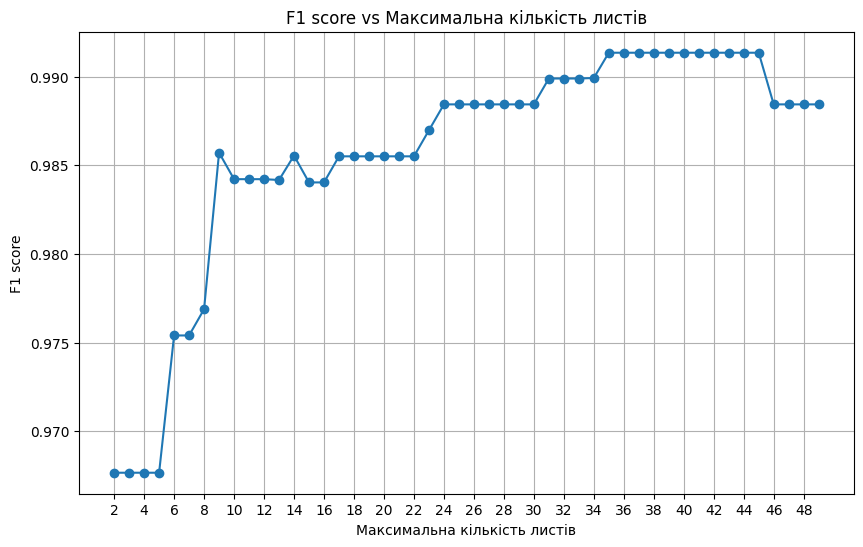

In [117]:
max_leaf_nodes_values = []
f_scores_values = []

for max_leaf_nodes in range(2, 50):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion='entropy', random_state=24)
    model.fit(x_cord_train, y_cord_train)

    model_predictions = model.predict(x_cord_test)
    f_scores = f1_score(y_cord_test, model_predictions)

    max_leaf_nodes_values.append(max_leaf_nodes)
    f_scores_values.append(f_scores)

plt.figure(figsize=(10, 6))
plt.plot(max_leaf_nodes_values, f_scores_values, marker='o', linestyle='-')
plt.title('F1 score vs Максимальна кількість листів')
plt.xlabel('Максимальна кількість листів')
plt.ylabel('F1 score')
plt.xticks(np.arange(min(max_leaf_nodes_values), max(max_leaf_nodes_values)+1, 2))
plt.grid()
plt.show()

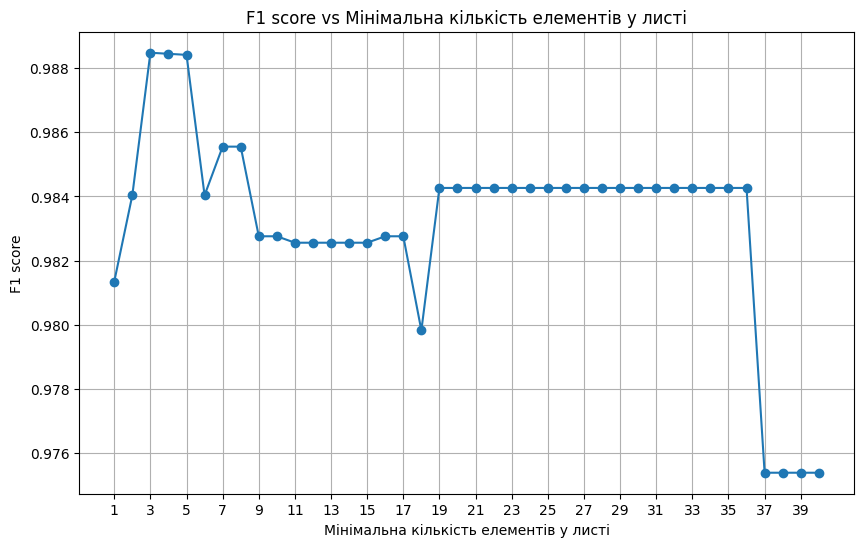

In [120]:
min_samples_leaf_values = []
f_scores_values = []

for min_samples_leaf in range(1, 41):
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, criterion='entropy', random_state=24)
    model.fit(x_cord_train, y_cord_train)

    model_predictions = model.predict(x_cord_test)
    f_scores = f1_score(y_cord_test, model_predictions)

    min_samples_leaf_values.append(min_samples_leaf)
    f_scores_values.append(f_scores)

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, f_scores_values, marker='o', linestyle='-')
plt.title('F1 score vs Мінімальна кількість елементів у листі')
plt.xlabel('Мінімальна кількість елементів у листі')
plt.ylabel('F1 score')
plt.xticks(np.arange(min(min_samples_leaf_values), max(min_samples_leaf_values)+1, 2))
plt.grid()
plt.show()

# 9. Навести стовпчикову діаграму важливості атрибутів, які використовувалися для класифікації (див. feature_importances_). Пояснити, яким чином – на Вашу думку – цю важливість можна підрахувати

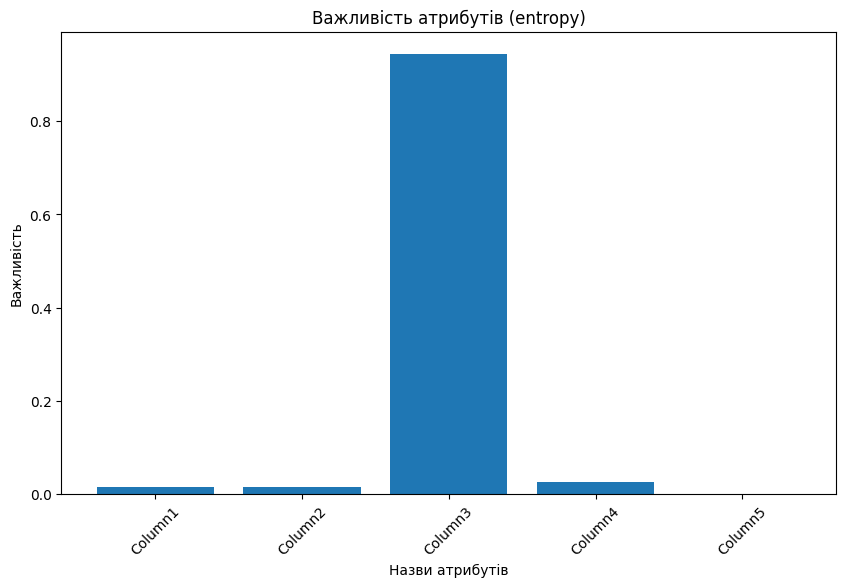

In [123]:
feature_importances_entropy = train_model_entropy.feature_importances_

feature_names = x_cord_train.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances_entropy)
plt.title('Важливість атрибутів (entropy)')
plt.xlabel('Назви атрибутів')
plt.ylabel('Важливість')
plt.xticks(rotation=45)
plt.show()

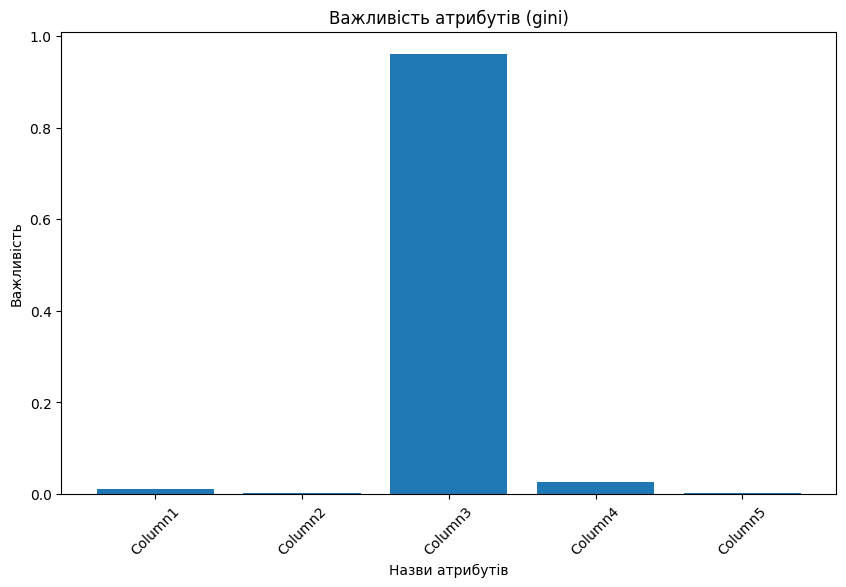

In [122]:
feature_importances_gini = train_model_gini.feature_importances_

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances_gini)
plt.title('Важливість атрибутів (gini)')
plt.xlabel('Назви атрибутів')
plt.ylabel('Важливість')
plt.xticks(rotation=45)
plt.show()